# CLASSIFICATION OF IRIS FLOWERS

In [72]:
# Load libraries
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Importing seaborn, a python graphing library 
import warnings # To ignore warnings
warnings.filterwarnings("ignore")

In [121]:
# Load Dataset 
iris = pd.read_csv('Iris.csv')

In [89]:
# Viewing Dataset 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
# Viewing Dimensions 
iris.shape

(150, 6)

In [85]:
# Statistical Information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [84]:
# SepalClass Distibution 
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [122]:
# Removing the unneeded column 
iris.drop('Id', axis=1, inplace=True)

# Data visualizations 

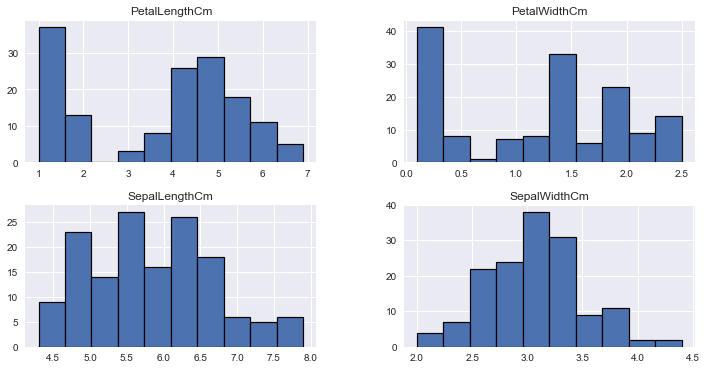

In [124]:
# Univariate plots 
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

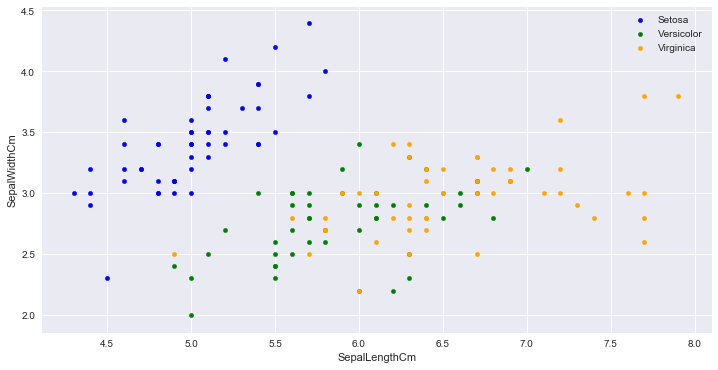

In [125]:
# Relationship between sepal length and sepal width 
fig=iris[iris.Species=="Iris-setosa"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="blue", label="Setosa")
iris[iris.Species=="Iris-versicolor"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="green",label="Versicolor",ax=fig)
iris[iris.Species=="Iris-virginica"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="orange",label="Virginica", ax=fig)
fig=plt.gcf()
fig.set_size_inches(12,6)

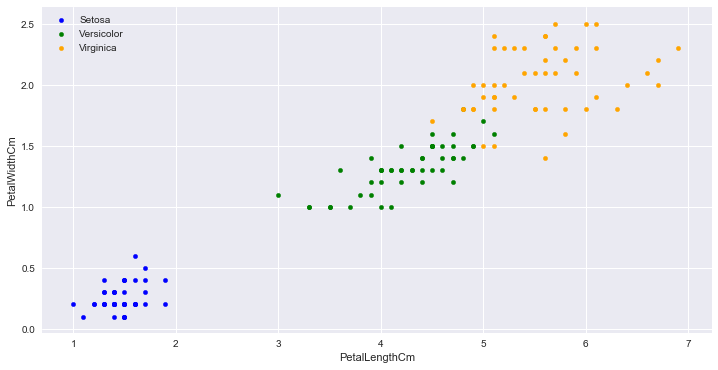

In [126]:
# Relationship between petal length and petal width 
fig=iris[iris.Species=="Iris-setosa"].plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", color="blue", label="Setosa")
iris[iris.Species=="Iris-versicolor"].plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", color="green",label="Versicolor",ax=fig)
iris[iris.Species=="Iris-virginica"].plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", color="orange",label="Virginica", ax=fig)
fig=plt.gcf()
fig.set_size_inches(12,6)

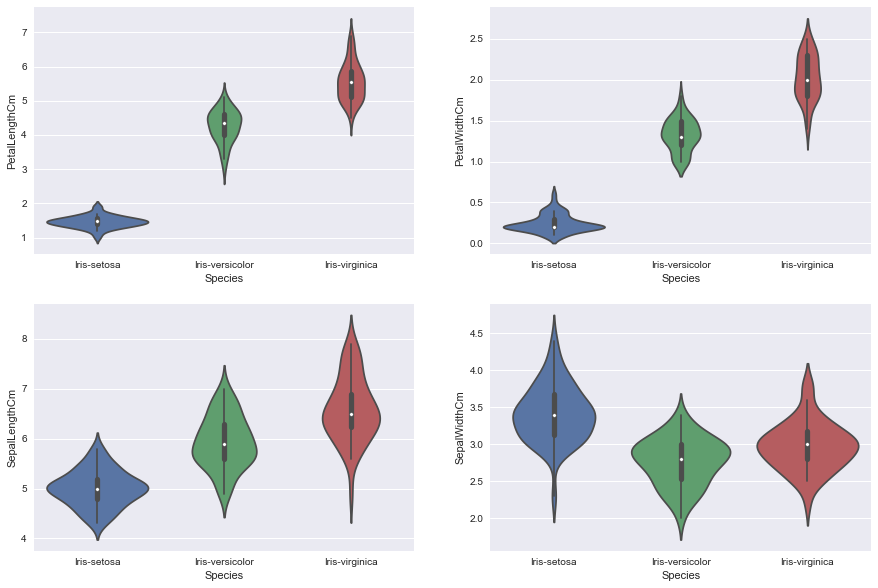

In [127]:
# Relation between length and width according to species 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

# Creating a classification model 

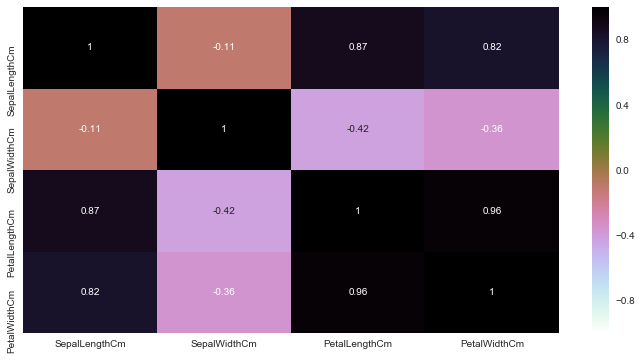

In [128]:
plt.figure(figsize=(12,6)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

## Observation :
    The sepal width and Length are not correlated. The Petal Width and Length are highly correlated.

In [129]:
# Importing all necessary packages to use various classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [130]:
# Splitting data into Training and Testing Dataset 
train, test=train_test_split(iris, test_size=0.3)
print("Train set",train.shape)
print("Test set ",test.shape)

Train set (105, 5)
Test set  (45, 5)


In [131]:
train_X=train[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_Y=train.Species
test_X=test[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_Y=test.Species

In [132]:
# Checking train and test dataset 
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
18,5.7,3.8,1.7,0.3
81,5.5,2.4,3.7,1.0
74,6.4,2.9,4.3,1.3
80,5.5,2.4,3.8,1.1
129,7.2,3.0,5.8,1.6


In [133]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
15,5.7,4.4,1.5,0.4
61,5.9,3.0,4.2,1.5
62,6.0,2.2,4.0,1.0
143,6.8,3.2,5.9,2.3
93,5.0,2.3,3.3,1.0


In [134]:
train_Y.head()

18         Iris-setosa
81     Iris-versicolor
74     Iris-versicolor
80     Iris-versicolor
129     Iris-virginica
Name: Species, dtype: object

In [135]:
test_Y.head()

15         Iris-setosa
61     Iris-versicolor
62     Iris-versicolor
143     Iris-virginica
93     Iris-versicolor
Name: Species, dtype: object

In [144]:
# Support Vector Machine (SVM)
model=svm.SVC()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the SVM is : ', metrics.accuracy_score(prediction, test_Y))

The accuracy of the SVM is :  1.0


In [143]:
# Logistic Regression 
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is : ', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Logistic Regression is :  0.933333333333


In [142]:
# Decision Tree  
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is : ', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Decision Tree is :  0.977777777778


In [148]:
# K-Nearest Neighbours 
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is : ', metrics.accuracy_score(prediction, test_Y))

The accuracy of the KNN is :  1.0


([<matplotlib.axis.XTick at 0x7f69ea09ed30>,
 <a list of 10 Text xticklabel objects>)

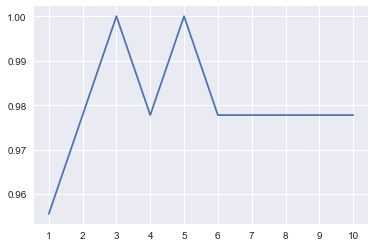

In [145]:
# Checking the accuracy for various values of n for K-Nearest Neighbors
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)